In [153]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sn
import matplotlib.pyplot as plt

In [154]:
X_train_tfidf = pd.read_csv("X_train_tfidf.csv", delimiter= ',')
X_test_tfidf = pd.read_csv("X_test_tfidf.csv", delimiter= ',')
y_train = pd.read_csv("y_train.csv", delimiter= ',')
y_test = pd.read_csv("y_test.csv", delimiter= ',')


In [155]:
y_train

,Fake
0,0
1,0
2,1
3,0
4,0
...,...
1275,0
1276,0
1277,1
1278,1


In [156]:
y_test

,Fake
0,0
1,0
2,0
3,1
4,0
...,...
315,0
316,0
317,0
318,0


In [157]:
def model_eval(model, X_train_tfidf, y_train, X_test_tfidf, y_test):
    model.fit(X_train_tfidf, y_train)
    # accuracy score on the training data
    X_train_prediction = model.predict(X_train_tfidf)

    training_data_accuracy = accuracy_score(X_train_prediction, y_train)
    print('Accuracy score of the training data : ', training_data_accuracy)

    print(classification_report(y_train, X_train_prediction))

    cm1 = confusion_matrix(y_train, X_train_prediction)
    ax = plt.subplot()
    sn.set(font_scale=1.4 ) # for label size
    sn.heatmap(cm1, annot=True, fmt='d', ax=ax, cmap='Blues') # font size
    ax.set_title("Confusion matrix of train dataset")
    ax.set_ylabel('Actual')
    ax.set_xlabel('Predicted')
    plt.show()

    # accuracy score on the test data
    X_test_prediction = model.predict(X_test_tfidf)

    test_data_accuracy = accuracy_score(X_test_prediction, y_test)
    print('Accuracy score of the test data : ', test_data_accuracy)

    print(classification_report(y_test, X_test_prediction))

    cm2 = confusion_matrix(y_test, X_test_prediction)
    ax = plt.subplot()
    sn.set(font_scale=1.4 ) # for label size
    sn.heatmap(cm2, annot=True, fmt='d', ax=ax, cmap='Blues') # font size
    ax.set_title("Confusion matrix of test dataset")
    ax.set_ylabel('Actual')
    ax.set_xlabel('Predicted')
    plt.show()

/usr/local/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy score of the training data :  0.8765625
              precision    recall  f1-score   support

           0       0.95      0.80      0.87       649
           1       0.82      0.95      0.88       631

    accuracy                           0.88      1280
   macro avg       0.89      0.88      0.88      1280
weighted avg       0.89      0.88      0.88      1280



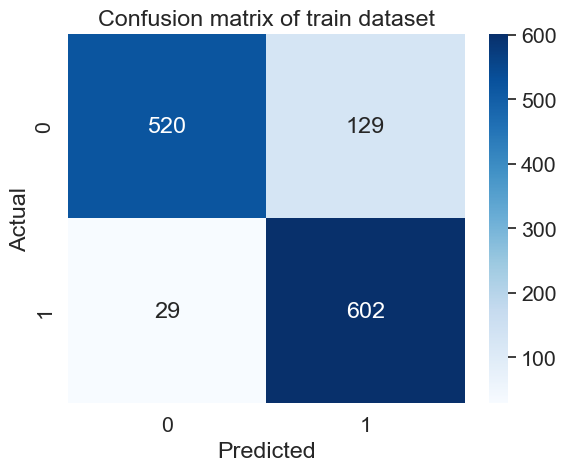

Accuracy score of the test data :  0.80625
              precision    recall  f1-score   support

           0       0.89      0.67      0.77       151
           1       0.76      0.93      0.84       169

    accuracy                           0.81       320
   macro avg       0.83      0.80      0.80       320
weighted avg       0.82      0.81      0.80       320



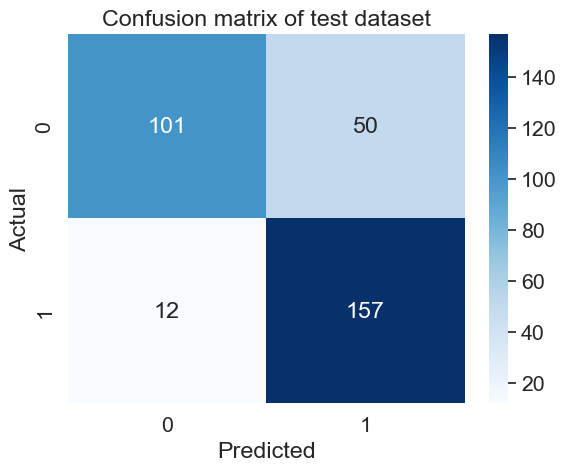

In [158]:
model_eval(LogisticRegression(), X_train_tfidf, y_train, X_test_tfidf, y_test)

/usr/local/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy score of the training data :  0.97265625
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       649
           1       0.96      0.98      0.97       631

    accuracy                           0.97      1280
   macro avg       0.97      0.97      0.97      1280
weighted avg       0.97      0.97      0.97      1280



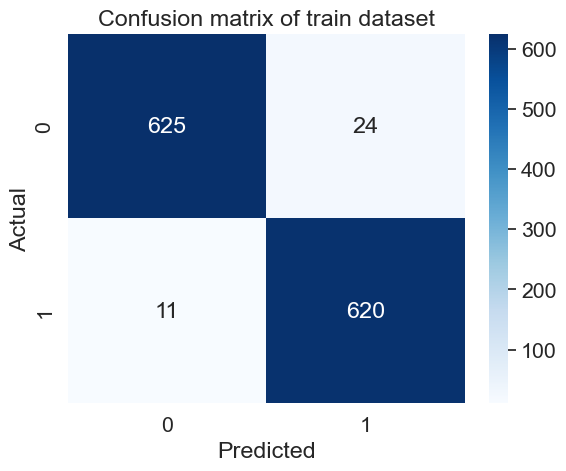

Accuracy score of the test data :  0.809375
              precision    recall  f1-score   support

           0       0.85      0.72      0.78       151
           1       0.78      0.89      0.83       169

    accuracy                           0.81       320
   macro avg       0.82      0.80      0.81       320
weighted avg       0.81      0.81      0.81       320



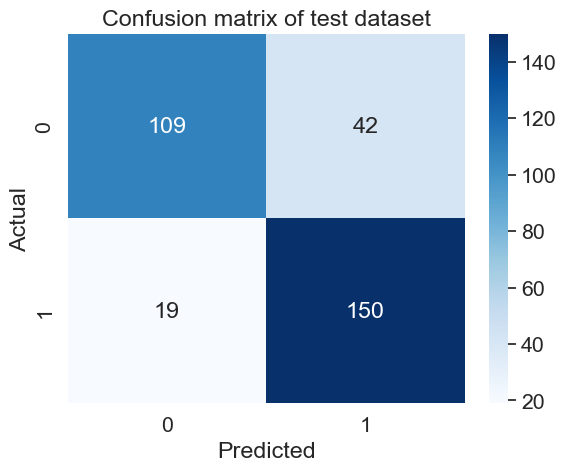

In [159]:
model_eval(svm.SVC(kernel='linear'), X_train_tfidf, y_train, X_test_tfidf, y_test)

Accuracy score of the training data :  0.9984375
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       649
           1       1.00      1.00      1.00       631

    accuracy                           1.00      1280
   macro avg       1.00      1.00      1.00      1280
weighted avg       1.00      1.00      1.00      1280



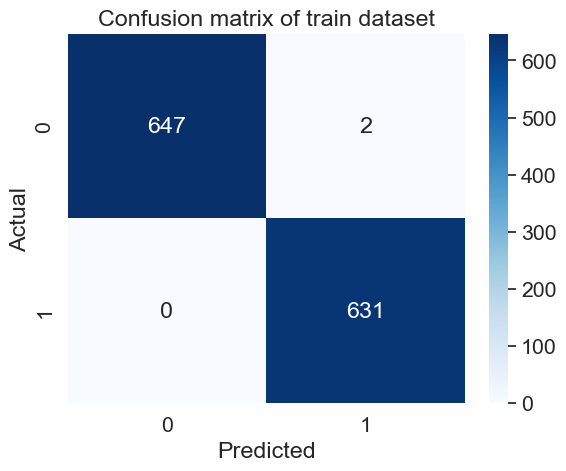

Accuracy score of the test data :  0.7625
              precision    recall  f1-score   support

           0       0.78      0.69      0.73       151
           1       0.75      0.83      0.79       169

    accuracy                           0.76       320
   macro avg       0.77      0.76      0.76       320
weighted avg       0.76      0.76      0.76       320



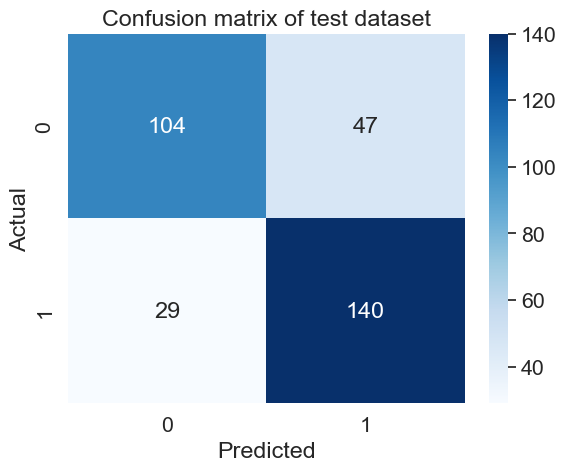

In [160]:
model_eval(tree.DecisionTreeClassifier(), X_train_tfidf, y_train, X_test_tfidf, y_test)

/usr/local/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy score of the training data :  0.7984375
              precision    recall  f1-score   support

           0       0.88      0.70      0.78       649
           1       0.74      0.90      0.82       631

    accuracy                           0.80      1280
   macro avg       0.81      0.80      0.80      1280
weighted avg       0.81      0.80      0.80      1280



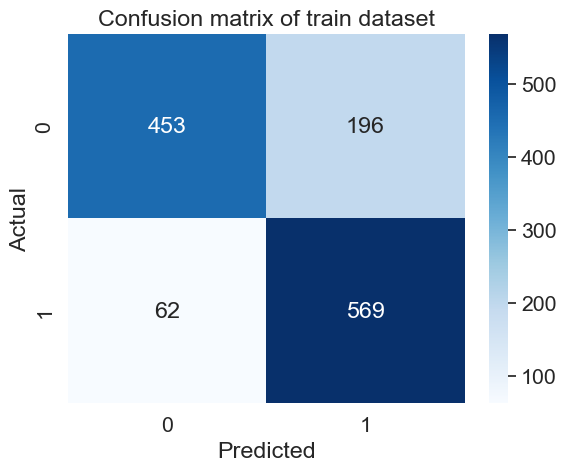

Accuracy score of the test data :  0.809375
              precision    recall  f1-score   support

           0       0.89      0.68      0.77       151
           1       0.76      0.92      0.84       169

    accuracy                           0.81       320
   macro avg       0.83      0.80      0.80       320
weighted avg       0.82      0.81      0.81       320



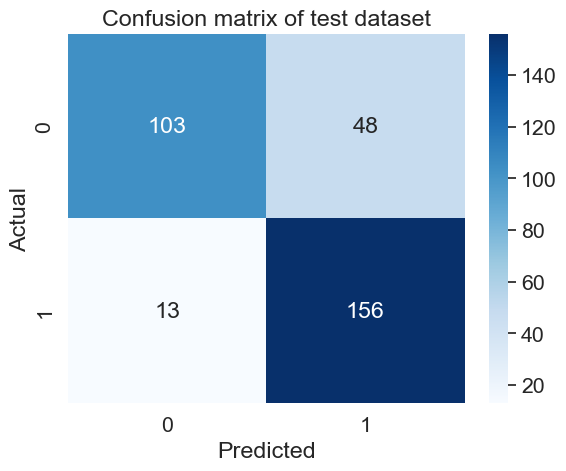

In [161]:
model_eval(svm.SVC(), X_train_tfidf, y_train, X_test_tfidf, y_test)

/usr/local/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy score of the training data :  0.98359375
              precision    recall  f1-score   support

           0       1.00      0.97      0.98       649
           1       0.97      1.00      0.98       631

    accuracy                           0.98      1280
   macro avg       0.98      0.98      0.98      1280
weighted avg       0.98      0.98      0.98      1280



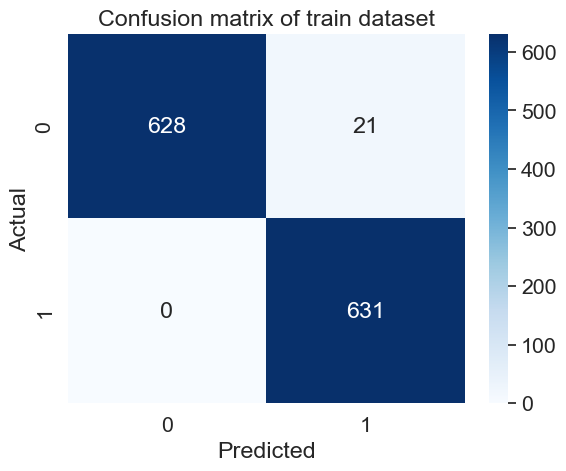

Accuracy score of the test data :  0.696875
              precision    recall  f1-score   support

           0       0.63      0.89      0.73       151
           1       0.84      0.53      0.65       169

    accuracy                           0.70       320
   macro avg       0.73      0.71      0.69       320
weighted avg       0.74      0.70      0.69       320



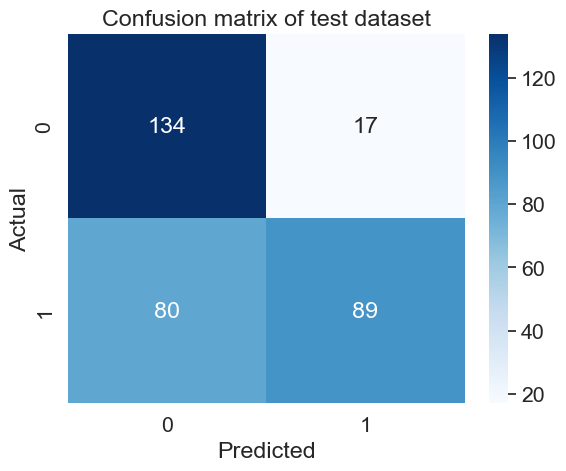

In [162]:
model_eval(GaussianNB(), X_train_tfidf, y_train, X_test_tfidf, y_test)

/usr/local/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy score of the training data :  0.86328125
              precision    recall  f1-score   support

           0       0.89      0.83      0.86       649
           1       0.84      0.90      0.87       631

    accuracy                           0.86      1280
   macro avg       0.86      0.86      0.86      1280
weighted avg       0.87      0.86      0.86      1280



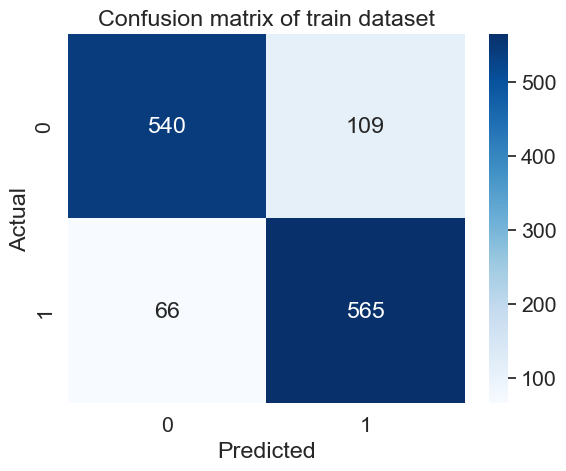

Accuracy score of the test data :  0.80625
              precision    recall  f1-score   support

           0       0.83      0.74      0.78       151
           1       0.79      0.86      0.82       169

    accuracy                           0.81       320
   macro avg       0.81      0.80      0.80       320
weighted avg       0.81      0.81      0.81       320



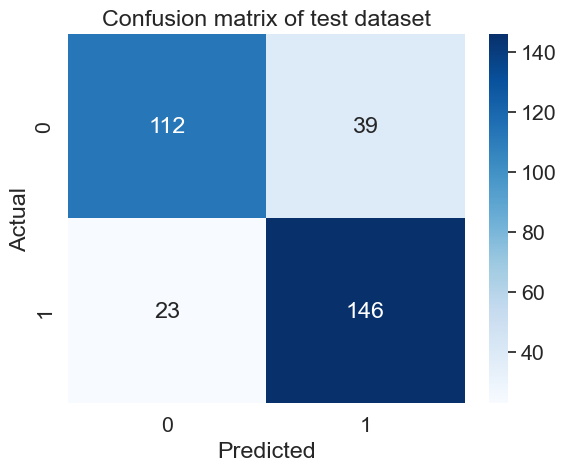

In [164]:
model_eval(KNeighborsClassifier(), X_train_tfidf, y_train, X_test_tfidf, y_test)